In [1]:
import pandas as pd
df = pd.read_csv('../data/data_divorce.csv')

### 3.6 Distribución Temporal

In [2]:
# Divorcios por año
print("\nDISTRIBUCIÓN DE DIVORCIOS POR AÑO:")
print("=" * 80)

# Buscar la columna que empieza con A y termina con REG (es la del año)
col_año = [col for col in df.columns if col.endswith('OREG') and col.startswith('A')][0]

print(f"✅ Usando columna: '{col_año}'\n")

divorcios_año = df[col_año].value_counts().sort_index()
for año, cantidad in divorcios_año.items():
    print(f"  {int(año)}: {cantidad:,} divorcios")

print(f"\nPromedio anual: {divorcios_año.mean():.0f} divorcios")
print(f"Total 2012-2022: {divorcios_año.sum():,} divorcios")


DISTRIBUCIÓN DE DIVORCIOS POR AÑO:
✅ Usando columna: 'AÑOREG'

  2012: 3,953 divorcios
  2013: 5,581 divorcios
  2014: 5,392 divorcios
  2015: 5,735 divorcios
  2016: 5,674 divorcios
  2017: 5,694 divorcios
  2018: 6,158 divorcios
  2019: 8,430 divorcios
  2020: 4,102 divorcios
  2021: 9,116 divorcios
  2022: 10,237 divorcios
  2023: 1,504 divorcios

Promedio anual: 5965 divorcios
Total 2012-2022: 71,576 divorcios


### 3.7 Visualización de Distribución Anual

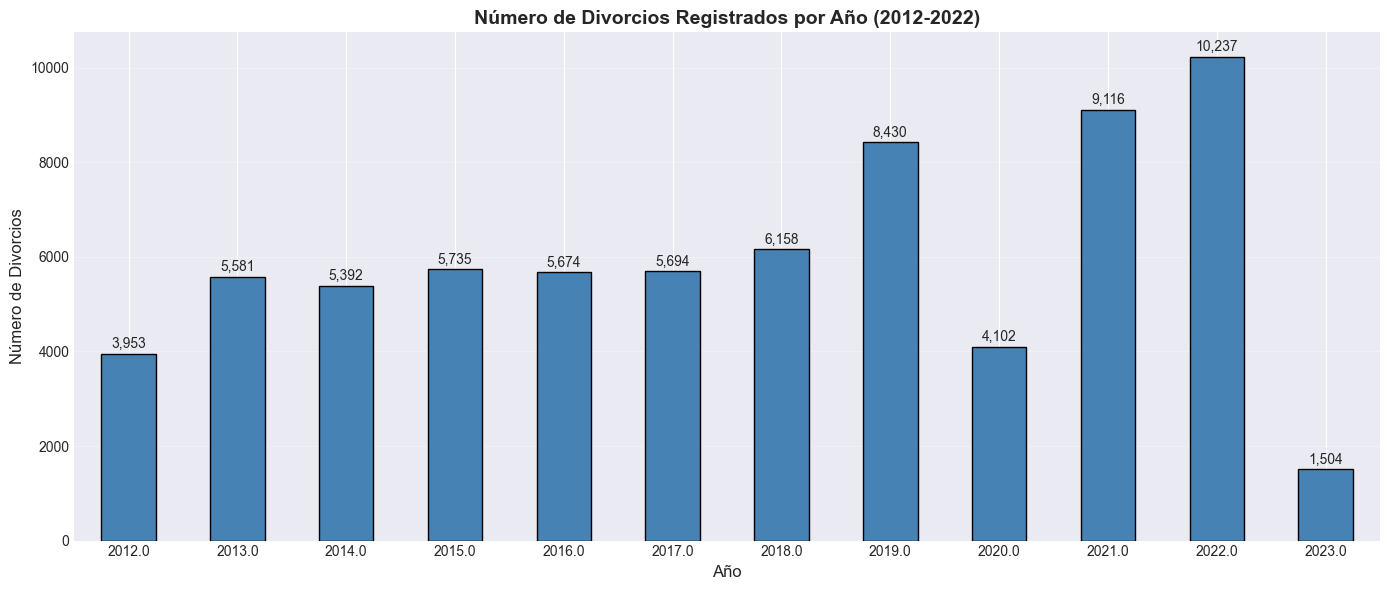

In [23]:
# Gráfico de divorcios por año
plt.figure(figsize=(14, 6))

divorcios_año.plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Número de Divorcios Registrados por Año (2012-2022)', fontsize=14, fontweight='bold')
plt.xlabel('Año', fontsize=12)
plt.ylabel('Número de Divorcios', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)

# Agregar valores sobre las barras
for i, v in enumerate(divorcios_año.values):
    plt.text(i, v + 50, f'{v:,}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

### 3.8 Distribución Geográfica

In [24]:
# Divorcios por departamento de ocurrencia
print("\nTOP 10 DEPARTAMENTOS CON MÁS DIVORCIOS (Lugar de Ocurrencia):")
print("=" * 80)

top_deptos = df['DEPOCU'].value_counts().head(10)
for depto, cantidad in top_deptos.items():
    porcentaje = (cantidad / len(df)) * 100
    print(f"  {depto:20}: {cantidad:6,} divorcios ({porcentaje:5.2f}%)")


TOP 10 DEPARTAMENTOS CON MÁS DIVORCIOS (Lugar de Ocurrencia):
  Guatemala           : 26,530 divorcios (37.07%)
  Quetzaltenango      :  5,437 divorcios ( 7.60%)
  Escuintla           :  3,481 divorcios ( 4.86%)
  Jutiapa             :  3,064 divorcios ( 4.28%)
  San Marcos          :  3,041 divorcios ( 4.25%)
  Huehuetenango       :  2,480 divorcios ( 3.46%)
  Izabal              :  2,313 divorcios ( 3.23%)
  Suchitepequez       :  2,108 divorcios ( 2.95%)
  Retalhuleu          :  2,072 divorcios ( 2.89%)
  Santa Rosa          :  2,051 divorcios ( 2.87%)
